In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
# Data
---

In [63]:
df = pd.read_csv('Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


<Axes: xlabel='area', ylabel='price'>

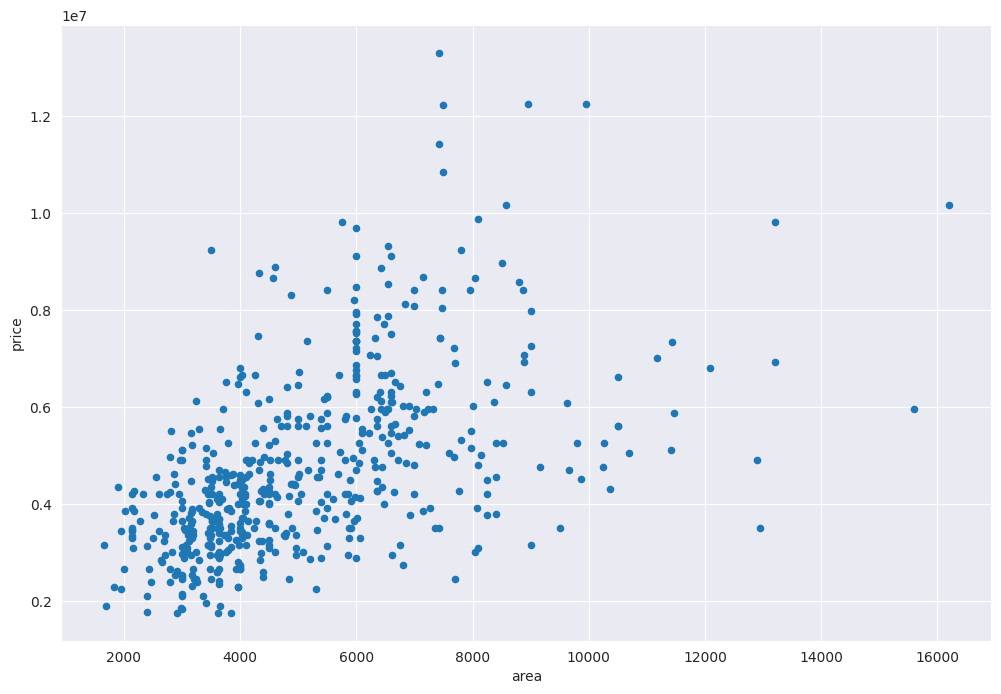

In [64]:
df.plot(x='area',y='price', kind='scatter', figsize=(12,8))

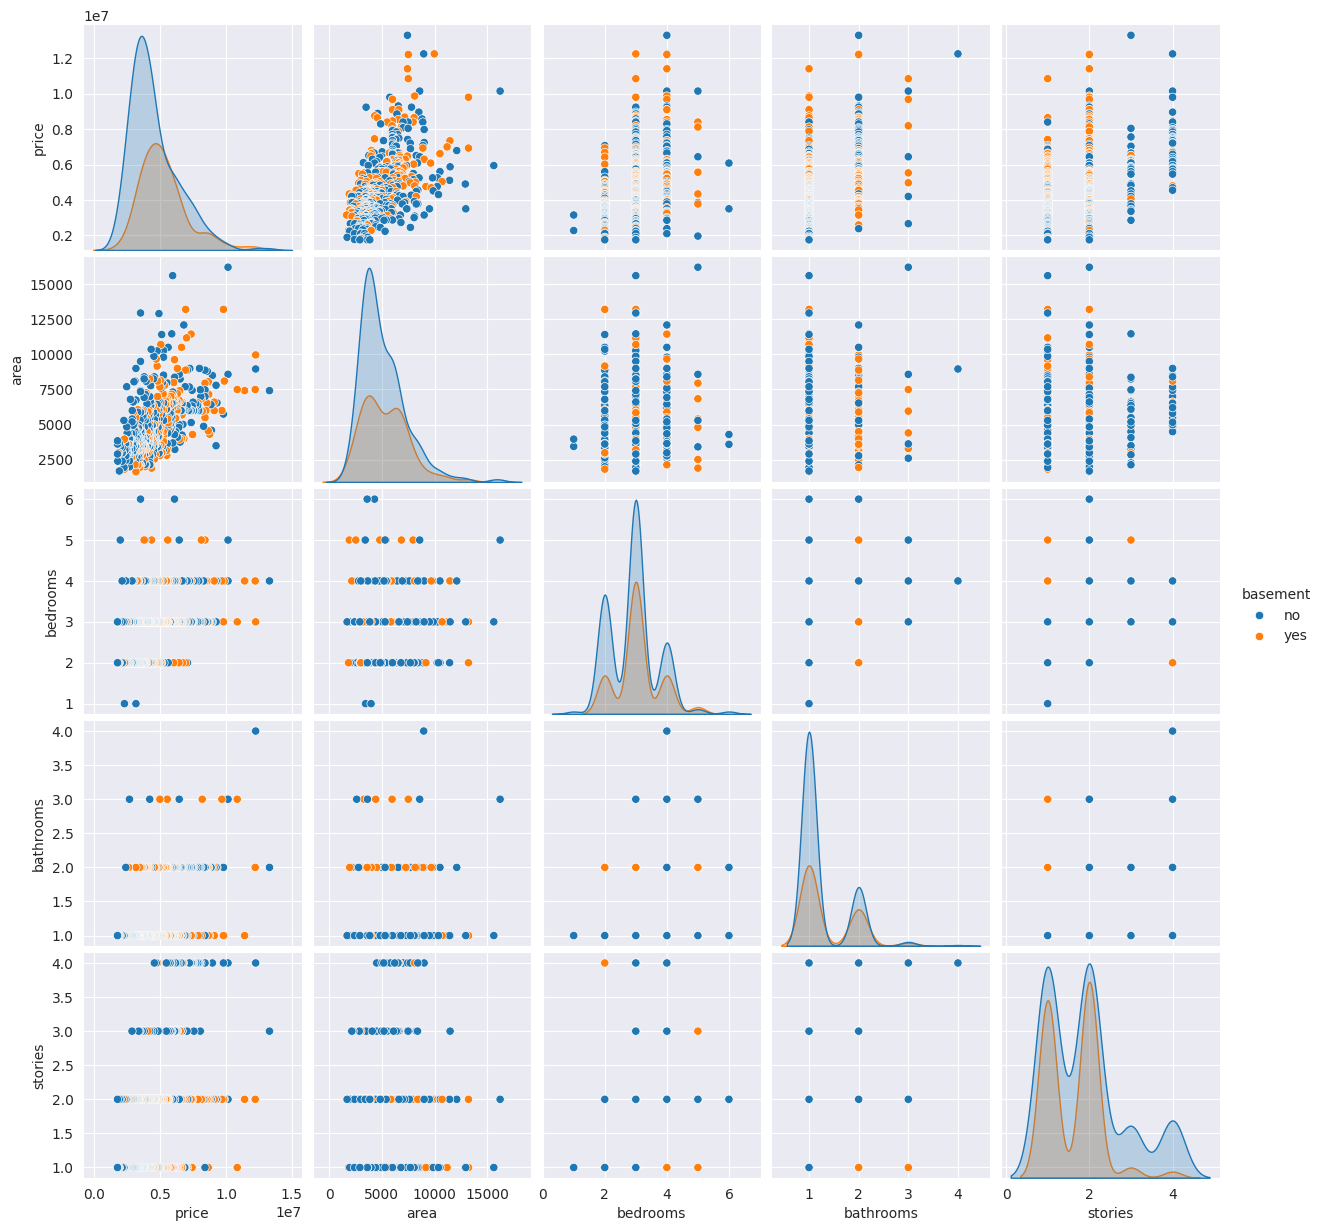

In [65]:
sns.set_style(style='darkgrid')
sns.pairplot(df,
             vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories'],
             hue='basement')
plt.show()


In [66]:
df_corr = df[['area', 'price']].corr()
df_corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


---
# Linear Regression
---

$$h(x) = w_0 + w_1*x$$

In [67]:
# hypotesis
def h( w_0, w_1, x):
    return w_0 + w_1*x



---
# Compute Loss function
---

$$
J(w) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(x^{(i)}, w) - y^{(i)} \right)^2
$$

In [68]:
df.shape

(545, 13)

In [69]:
def loss_function(w_0, w_1, df):

    n = df.area.shape[0]  # Number of data points
    cost = 0

    for x, y in zip(df.area, df.price):
        cost += (h( w_0, w_1, x) - y)**2

    return cost/(2*n)



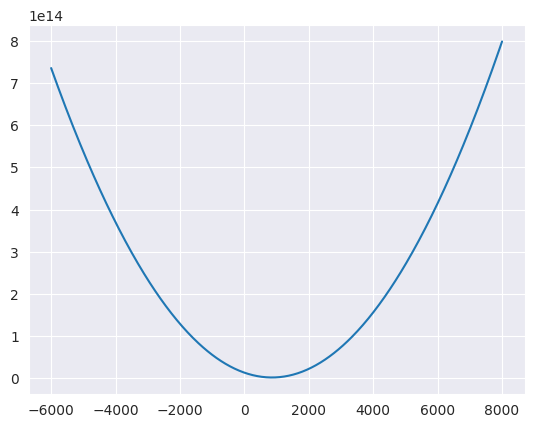

In [70]:
w_0 = 0

w_1 = np.linspace(-6000, 8000, 500)

plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

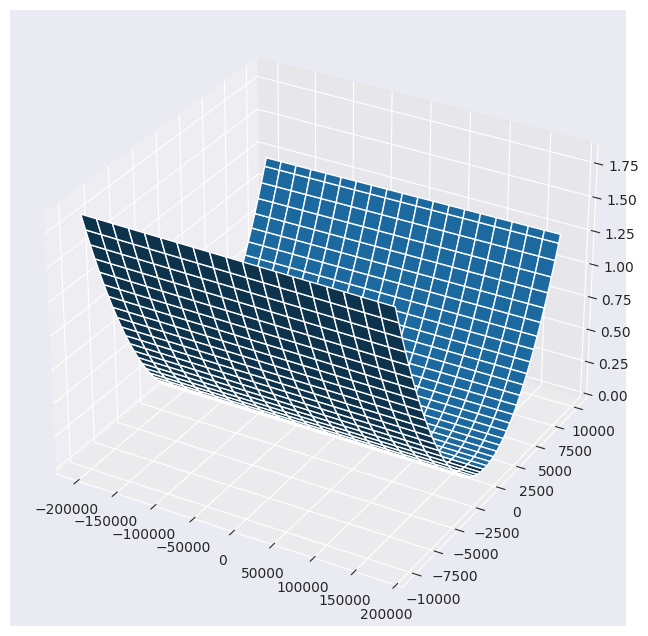

In [71]:
grid_w_0 = np.arange(-200_000, 200_000, 20_000)
grid_w_1 = np.arange(-10_000, 10_000, 200)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, df)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w_0, w_1, z)
plt.show()


---
# Gradient Descent
---

In [72]:

def grad_step(w_0, w_1,  d_w_0, d_w_1, learning_rate = 0.001):

    w_0 -= learning_rate* d_w_0
    w_1 -= learning_rate* d_w_1

    return w_0, w_1


In [73]:
def grad_w_0(w_0, w_1, df):

    n = df.area.shape[0]  # Number of data points
    cost = 0

    for x, y in zip(df.area, df.price):
        cost += (h( w_0, w_1, x) - y)

    return cost/n

def grad_w_1(w_0, w_1, df):

    n = df.area.shape[0]  # Number of data points
    cost = 0

    for x, y in zip(df.area, df.price):
        cost += (h( w_0, w_1, x) - y)*x

    return cost/n

In [74]:
def grad_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 0.00000001):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):
        # gradient computation
        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        w_0, w_1 = grad_step(w_0, w_1, d_w_0, d_w_1, learning_rate=learning_rate)
        
        loss = loss_function(w_0, w_1, df)

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w_0, w_1, loss_history




In [75]:
# weights, loss_history = grad_descent((0.,0.), df, 1000)  # IndexError: list index out of range


# need to normilize...

---
# Normalization
---

In [76]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x-mean)/value_range
        result.append(norm_x)
    
    return result

In [77]:
norm = pd.DataFrame()

norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)

norm.head(7)

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
5,0.526690,0.161475
6,0.466084,0.235702


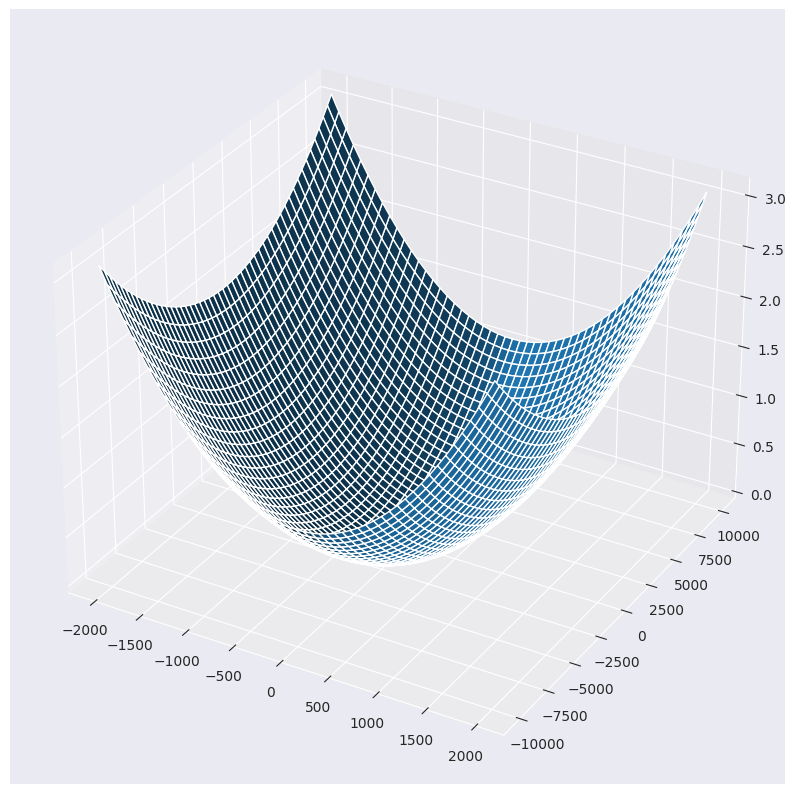

In [78]:
grid_w_0 = np.arange(-2_000, 2_000, 10)
grid_w_1 = np.arange(-10_000, 10_000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z = loss_function(w_0, w_1, norm)

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w_0, w_1, z)
plt.show()

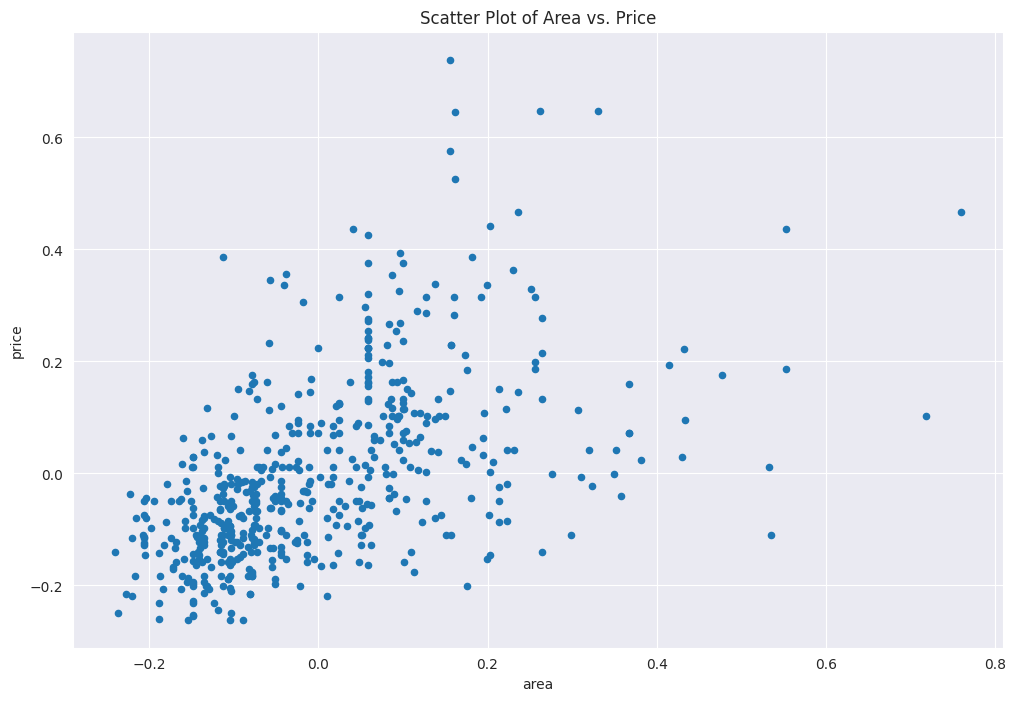

In [79]:
norm.plot(x='area', y = 'price', kind='scatter', figsize=(12,8), title='Scatter Plot of Area vs. Price')
plt.show()

---
# Model Training
---

In [80]:
# w_0, w_1, history = grad_descent((0.,0.), norm, 1000)

w_0, w_1, history = grad_descent((0.,0.), norm, 1000, learning_rate=0.1)

In [81]:
w_0

3.442709929571591e-17

In [82]:
w_1

0.5189491876061754

In [83]:
history

[0.013088679029173688,
 0.013071998071880324,
 0.013055391112733966,
 0.013038857823472602,
 0.013022397877290348,
 0.013006010948831033,
 0.012989696714181874,
 0.012973454850866876,
 0.012957285037840686,
 0.012941186955482053,
 0.012925160285587626,
 0.012909204711365667,
 0.01289331991742972,
 0.012877505589792369,
 0.012861761415859116,
 0.012846087084422189,
 0.01283048228565433,
 0.012814946711102651,
 0.012799480053682649,
 0.012784082007672087,
 0.012768752268704907,
 0.012753490533765231,
 0.012738296501181386,
 0.012723169870619973,
 0.012708110343079905,
 0.012693117620886436,
 0.012678191407685356,
 0.012663331408437135,
 0.012648537329411003,
 0.012633808878179274,
 0.01261914576361146,
 0.012604547695868542,
 0.012590014386397274,
 0.012575545547924453,
 0.012561140894451232,
 0.012546800141247481,
 0.012532523004846191,
 0.012518309203037772,
 0.01250415845486458,
 0.012490070480615354,
 0.012476045001819593,
 0.012462081741242137,
 0.012448180422877698,
 0.012434340771

In [84]:
len(history)

1001

---
# Additional training
---

In [85]:
w_0, w_1, history_ext = grad_descent((w_0,w_1), norm, 1000, learning_rate=0.1)

---
# Visualization of training results
---

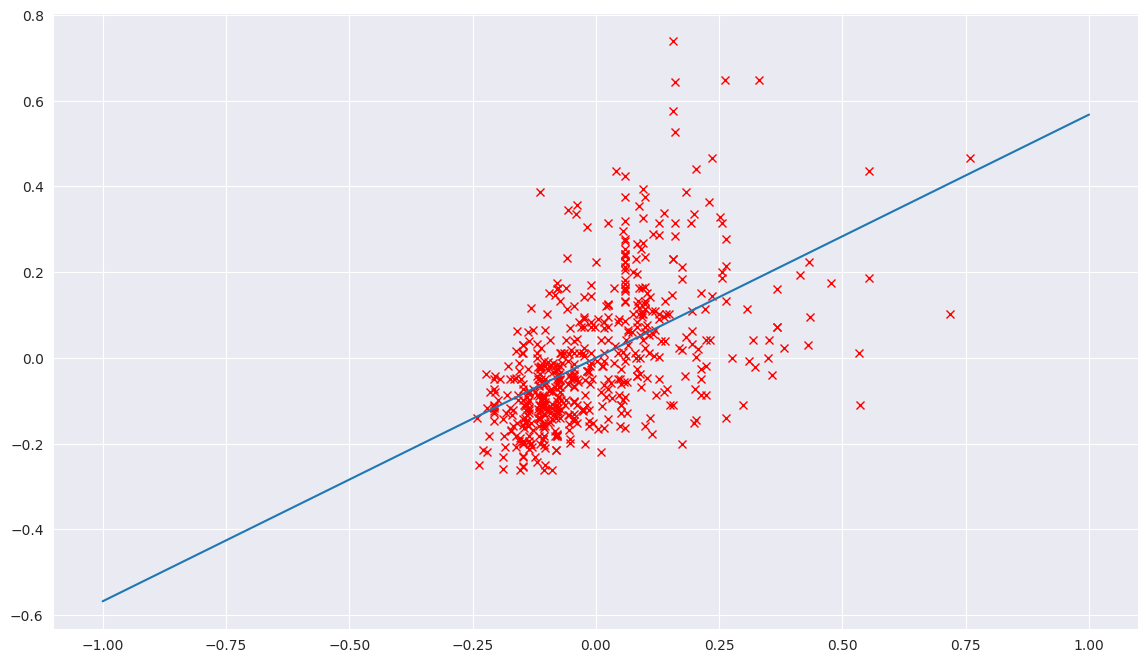

In [86]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-1, 1, 500)
plt.plot(x, h(w_0, w_1, x))

plt.show()



---
# Learning curve
---

In [101]:
history = history + history_ext

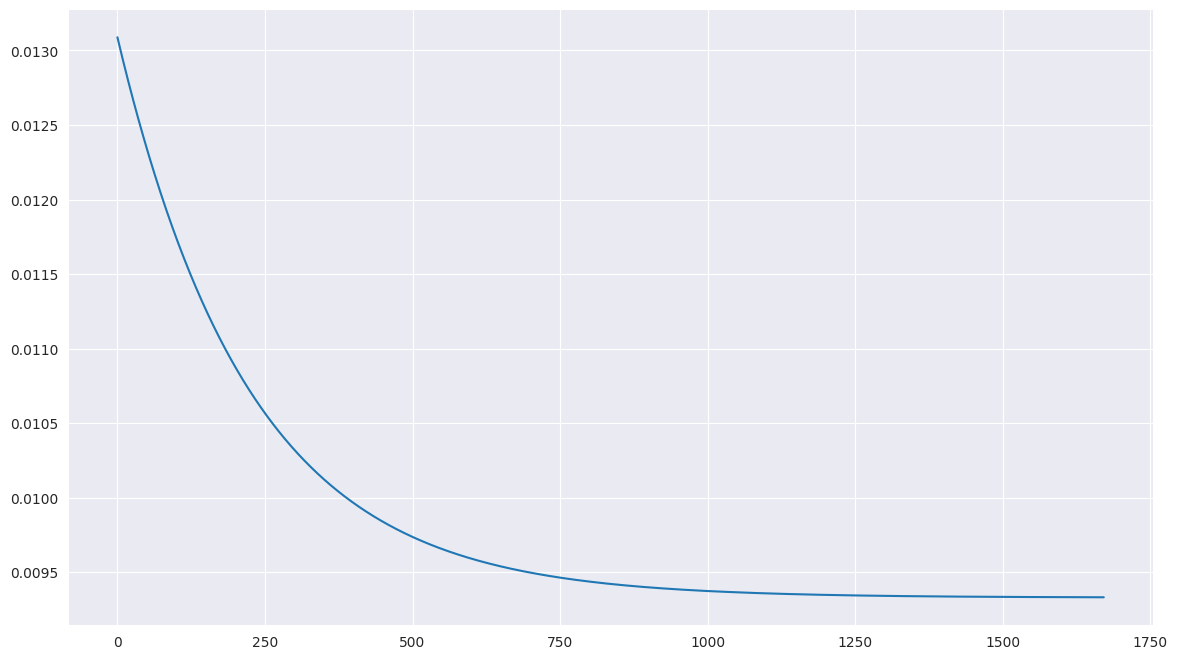

In [88]:
plt.figure(figsize=(14, 8))
plt.plot(history)
plt.show()

---
# Scikit-learn Linear Regression
---

In [89]:
from sklearn import linear_model

In [90]:
model = linear_model.LinearRegression()

In [91]:
# X = np.array(norm.area)
# print(X.shape)

# X = np.array(norm.area).T
# print(X.shape)

X = np.array([norm.area]).T
print(X.shape)

Y = np.array(norm.price)
print(Y.shape)



(545, 1)
(545,)


In [92]:
model.fit(X, Y)

LinearRegression()

In [93]:
print(f'{w_1 = }')
print(f'{model.coef_ = }')

w_1 = 0.5677569699045628
model.coef_ = array([0.58196837])


In [94]:
print(f'{w_0 = }')
print(f'{model.intercept_ = }')

w_0 = 3.9586071423905186e-17
model.intercept_ = np.float64(6.353102831524844e-17)


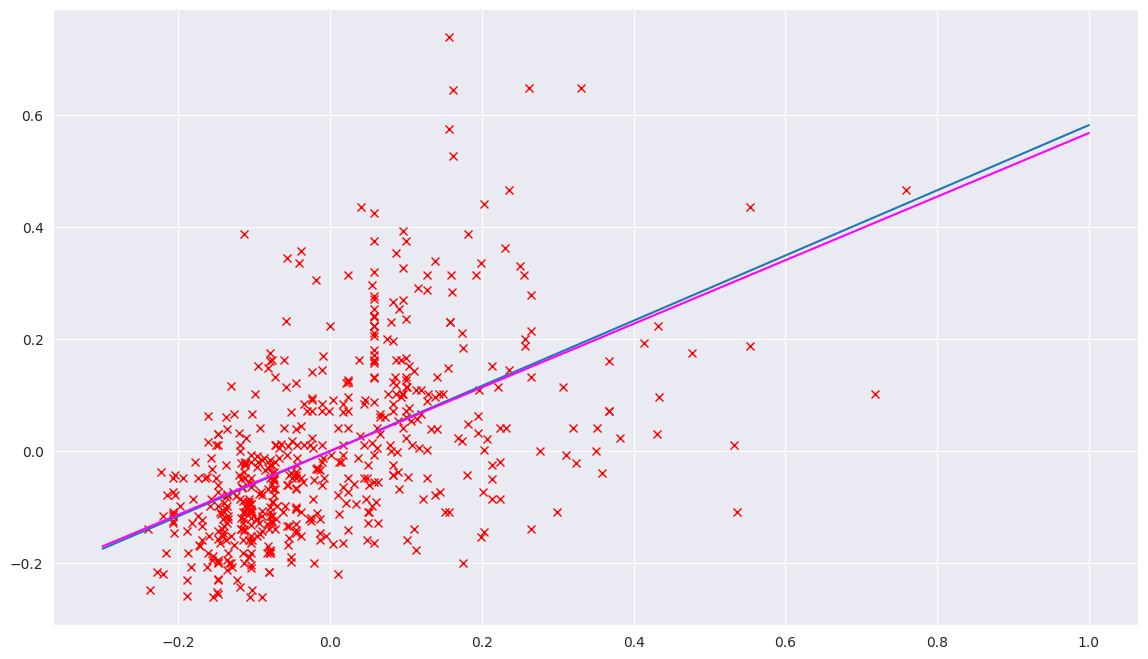

In [95]:
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_, x))
plt.plot(x, h(w_0, w_1, x), color='magenta')




In [96]:
norm

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
...,...,...
540,-0.255128,-0.147804
541,-0.259704,-0.189041
542,-0.261189,-0.105192
543,-0.261189,-0.153989


---
#  Least Squares Method. Метод найменших квадратів. 
---

$$
Loss = \sum (y - \hat{y})^2
$$


In [105]:
# 1. Підготовка даних
data = norm

# 2. Розділення Feature (X) та Target (y)
X = data["area"]  # Feature (area)
y = data["price"]  # Target (price)

# 3. Розрахунок коефіцієнтів
X_mean = X.mean()  # Середнє X (mean of area)
y_mean = y.mean()  # Середнє y (mean of price)

# Ковариація та дисперсія
cov_Xy = ((X - X_mean) * (y - y_mean)).sum()  # Коваріація
var_X = ((X - X_mean)**2).sum()  # Дисперсія

w = cov_Xy / var_X  # Коефіцієнт нахилу (slope)
b = y_mean - w * X_mean  # Зсув (intercept)

# 4. Передбачення
data["Прогнозована ціна"] = w * X + b

# 5. Вивід результатів
print(f"Коефіцієнт w: {w, w_1, model.coef_}")
print(f"Зсув b: {b, w_0, model.intercept_}")
print(data)


Коефіцієнт w: (np.float64(0.5819683733046754), np.float64(0.5511811643457), array([0.58196837]))
Зсув b: (np.float64(6.353102831524844e-17), np.float64(1.794110818417541e-09), np.float64(6.353102831524844e-17))
        price      area  Прогнозована ціна
0    0.738811  0.155977           0.090773
1    0.647902  0.261818           0.152370
2    0.647902  0.330547           0.192368
3    0.644872  0.161475           0.093973
4    0.575175  0.155977           0.090773
..        ...       ...                ...
540 -0.255128 -0.147804          -0.086017
541 -0.259704 -0.189041          -0.110016
542 -0.261189 -0.105192          -0.061218
543 -0.261189 -0.153989          -0.089617
544 -0.261189 -0.089384          -0.052019

[545 rows x 3 columns]


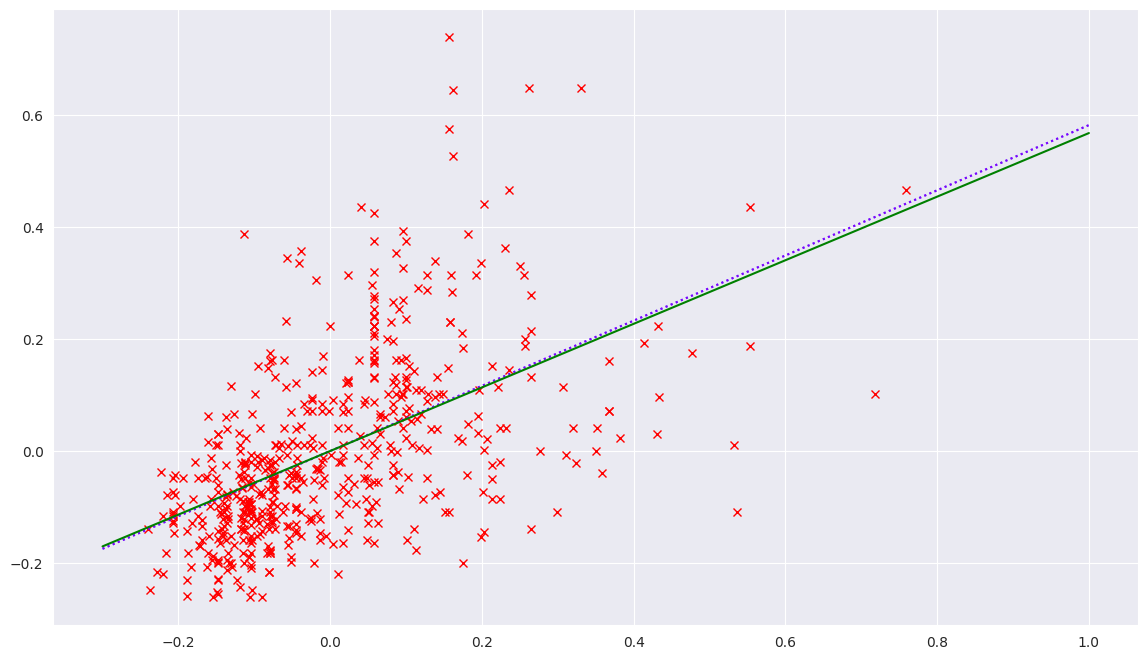

In [98]:
plt.figure(figsize=(14, 8))
plt.plot(data.area, data.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_, x), color='blue', linestyle=':')
plt.plot(x, h(b, w, x), color='magenta', linestyle=':', alpha=0.5)
plt.plot(x, h(w_0, w_1, x), color='green')


===
# simple example
===

In [99]:
import numpy as np

# Данні для лінійної регресії
# X = np.array([1, 2, 3, 4, 5])  # Вхідні дані
# y = np.array([1, 2, 3, 4, 5])  # Цільові значення
X = X
y = y

# Ініціалізація параметрів
w_0 = np.random.randn()  # Початкове значення коефіцієнта w_0 (зсув)
w_1 = np.random.randn()  # Початкове значення коефіцієнта w_1
alpha = 0.01  # Коефіцієнт навчання
iterations = 1000  # Кількість ітерацій

# Функція для прогнозу
def predict(X, w_0, w_1):
    return w_0 + w_1 * X

# Функція втрат (середній квадрат похибки)
def compute_loss(X, y, w_0, w_1):
    m = len(X)
    predictions = predict(X, w_0, w_1)
    return (1/m) * np.sum((y - predictions)**2)

# Градієнтний спад
for i in range(iterations):
    # Обчислення градієнтів
    dw_0 = -(2/len(X)) * np.sum(y - predict(X, w_0, w_1))
    dw_1 = -(2/len(X)) * np.sum(X * (y - predict(X, w_0, w_1)))

    # Оновлення параметрів
    w_0 -= alpha * dw_0
    w_1 -= alpha * dw_1

    # Виведення прогресу
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {compute_loss(X, y, w_0, w_1)}")

# Виведення оптимальних параметрів
print(f"Optimal w_0: {w_0}, Optimal w_1: {w_1}")


Iteration 0: Loss = 1.110146422109357
Iteration 100: Loss = 0.0378997236942104
Iteration 200: Loss = 0.01903720585144714
Iteration 300: Loss = 0.018701884277261882
Iteration 400: Loss = 0.01869272140312675
Iteration 500: Loss = 0.018689572563953864
Iteration 600: Loss = 0.018686783476506014
Iteration 700: Loss = 0.018684233103437357
Iteration 800: Loss = 0.01868189956116953
Iteration 900: Loss = 0.018679764389351247
Optimal w_0: 1.794110818417541e-09, Optimal w_1: 0.5511811643457
